<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/Classification_CustomerChurn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Classification machine learning is predicting binary situations. This for example, means predicting if a tunor is malignant, or if a person A on the test or not.

In [ ]:
df = pd.read_csv("/content/customer_churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **Preprocessing**

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
x = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
numerical = x.drop(['Geography', 'Gender'], axis = 1)
numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
categorical = x.filter(['Geography', 'Gender'])
categorical.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [ ]:
cat_numerical = pd.get_dummies(categorical,drop_first=True, dtype = int)
cat_numerical.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [ ]:
x = pd.concat([numerical, cat_numerical], axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from re import I
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
corr = x.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.010297,-0.006482,-0.008112
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,1.000000,-0.332084,-0.024628
Geography_Spain,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.332084,1.000000,0.016889


## **Correlation Map**

<Axes: >

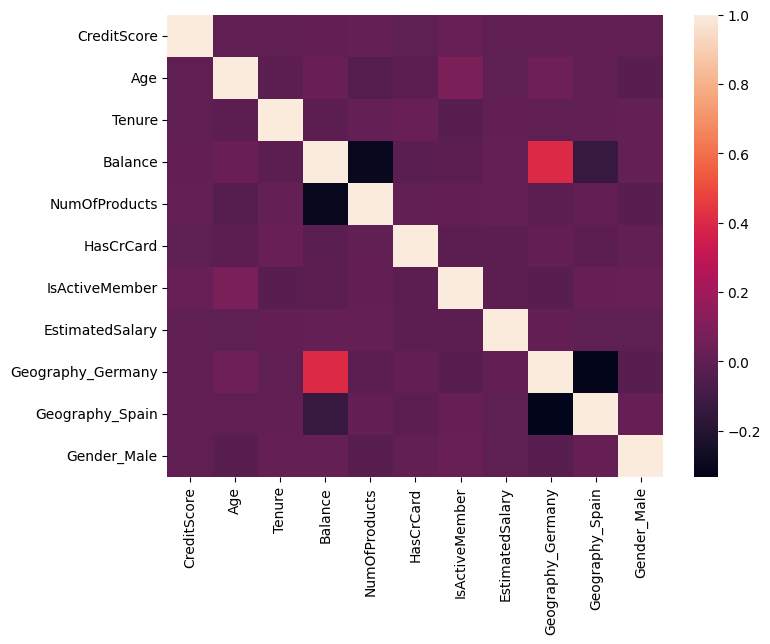

In [ ]:
sns.heatmap(corr)

## **Preprocessing Continued**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
classifier = log_clf.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

[[1526   69]
 [ 309   96]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

Accuracy:  0.811


Confusion Matrix
___________________

True Positive - When the actual result is positive and the predicted is also positivze

True Negative - When the actual resulkt is negative and the predicted one is also negative

False Negative - When the actual result positive and the predicted is negative

False Positive - When the actual result is negative and predicted is positive


### **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
classifier1 = knn_clf.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

[[1486  109]
 [ 237  168]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.41      0.49       405

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000

Accuracy:  0.827


### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42, n_estimators = 500)
classifier1 = rf_clf.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


[[1521   74]
 [ 196  209]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy:  0.865


### **Predicting a Single Record**

In [ ]:
single_record = sc.transform(x.values[105].reshape(1, -1))
predicted_churn = classifier1.predict(single_record)
print(predicted_churn)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


This is the predicted value for 'Exited' for the 105th row. It predicted the right output of 1.

### **SVM Regression**

In [ ]:
from sklearn import svm
svm_clf = svm.SVC()
classifier = svm_clf.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

[[1547   48]
 [ 225  180]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.79      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000

Accuracy:  0.8635


# **105th Record**

This is the 105th record that is predicted using the Random Forest Classifier earlier.

In [ ]:
df.loc[105]

,105
CreditScore,622
Geography,Spain
Gender,Female
Age,46
Tenure,4
Balance,107073.27
NumOfProducts,2
HasCrCard,1
IsActiveMember,1
EstimatedSalary,30984.59


This is, using the random forest classifier, the ROC and area under curve calculation. The higher the AUC the better the classifier.

### **ROC Curve Record**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = rf_clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.8717194937884594

### **Graph of ROC Curve**

---



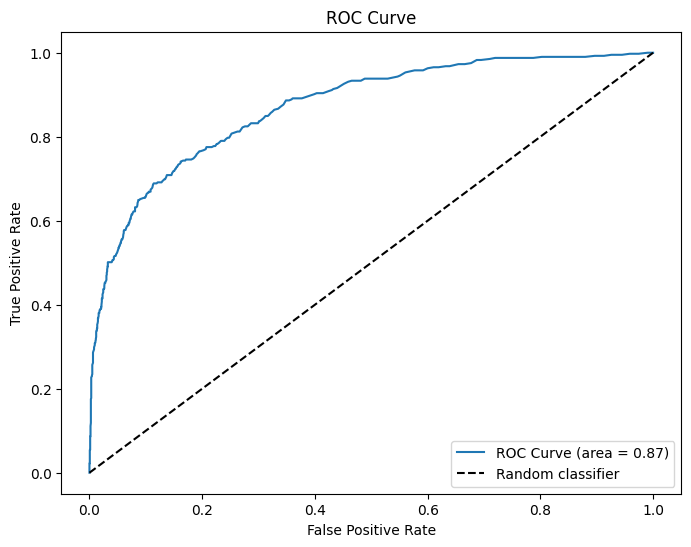

In [ ]:
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0,1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()